In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pymongo


In [11]:
pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.9 MB/s eta 0:00:0031m10.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
df = pd.read_csv('agrupada.csv')
df

,date,user_location,user_verified,conteo
0,2021-02-09,Texas,False,1
1,2021-02-09,"Bathurst, New Brunswick, Canada",False,2
2,2021-02-09,District of Columbia,False,1
3,2021-02-09,Blockchain,False,1
4,2021-02-09,Whitefield Bangalore,False,1
...,...,...,...,...
467460,2023-03-02,Somewhere at the Blockchain,False,1
467461,2023-03-02,Kevin Agustian,False,1
467462,2023-03-04,"Den Haag, Nederland",False,1
467463,2023-03-04,Australia🇦🇺🇦🇺,False,2


In [ ]:
import pandas as pd
import random

# Assuming you have a DataFrame named 'df' and two dates named 'start_date' and 'end_date'

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-12-31')

# Generate random dates between start_date and end_date
df['random_date'] = [start_date + pd.DateOffset(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(df))]

# Display the updated DataFrame
print(df)


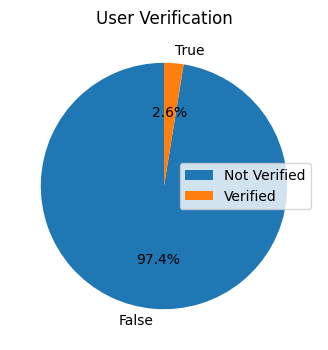

In [28]:
# Plot 2: Pie chart of user verification
plt.figure(figsize=(4, 4))
df['user_verified'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('User Verification')
plt.ylabel('')
plt.legend(['Not Verified', 'Verified'])
plt.show()

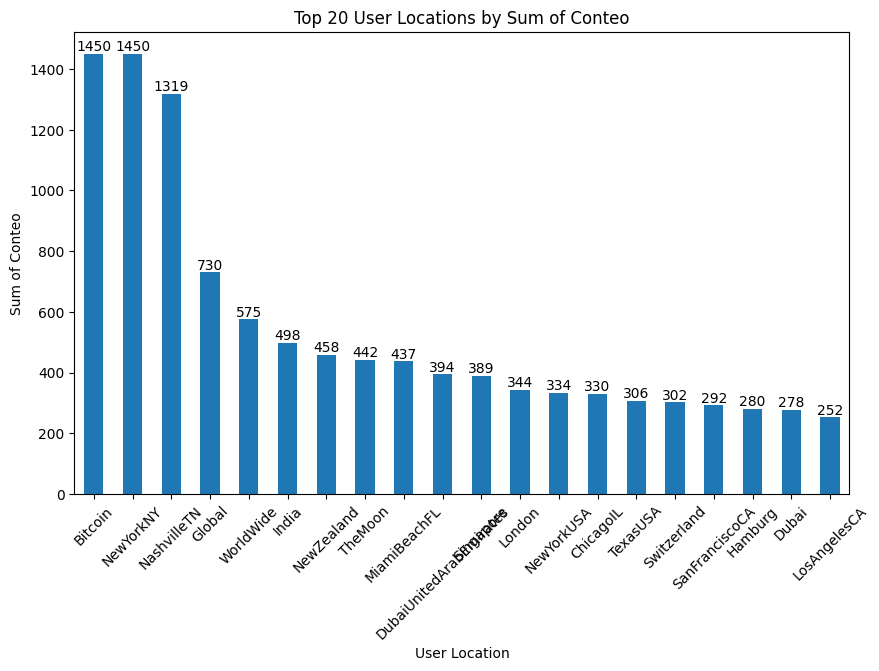

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the DataFrame 'df'


df_verified = df[df['user_verified'] == True]

# Group the data by 'user_location' and calculate the sum of 'conteo'
grouped_data = df_verified.groupby('user_location')['conteo'].sum().nlargest(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Top 20 User Locations by Sum of Conteo')
plt.xlabel('User Location')
plt.ylabel('Sum of Conteo')
plt.xticks(rotation=45)
# Display labels on the bars
for i, count in enumerate(grouped_data.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


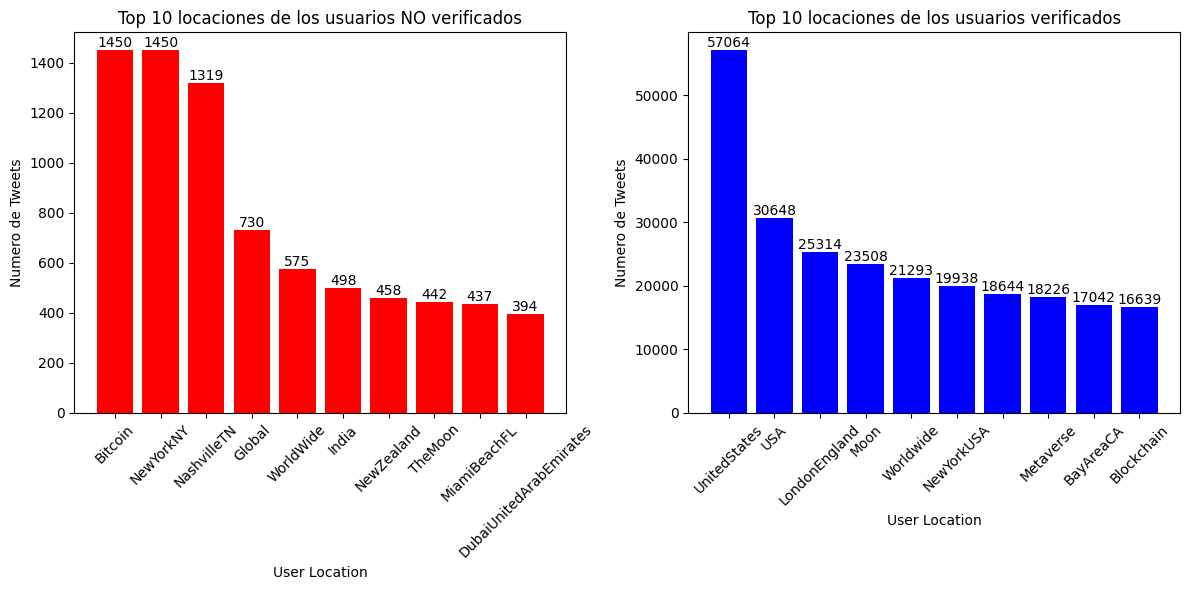

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined the DataFrame 'df'

# Filter the data to only include non-verified users
df_verified = df[df['user_verified'] == False]
grouped_data_verified = df_verified.groupby('user_location')['conteo'].sum().nlargest(10)


# Filter the data to only include verified users
df_no_verified = df[df['user_verified'] == True]
grouped_data_no_verified = df_no_verified.groupby('user_location')['conteo'].sum().nlargest(10)



# Plot the bar charts side by side horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# Bar plot for non-verified users
axes[0].bar(grouped_data_no_verified.index, grouped_data_no_verified.values, color='red')
axes[0].set_title('Top 10 locaciones de los usuarios NO verificados')
axes[0].set_xlabel('User Location')
axes[0].set_ylabel('Numero de Tweets')
axes[0].tick_params(axis='x', rotation=45)

# Display labels on the bars for non-verified users
for i, count in enumerate(grouped_data_no_verified.values):
    axes[0].text(i, count, str(count), ha='center', va='bottom')

# Bar plot for verified users
axes[1].bar(grouped_data_verified.index, grouped_data_verified.values, color='blue')
axes[1].set_title('Top 10 locaciones de los usuarios verificados')
axes[1].set_xlabel('User Location')
axes[1].set_ylabel('Numero de Tweets')
axes[1].tick_params(axis='x', rotation=45)

# Display labels on the bars for verified users
for i, count in enumerate(grouped_data_verified.values):
    axes[1].text(i, count, str(count), ha='center', va='bottom')

# Adjust the layout
plt.tight_layout()

plt.show()



